In [5]:
import numpy as np
import scipy.io 
import matplotlib.pyplot as plt
from matplotlib import cm

tlist = scipy.io.loadmat('msft_tlist.mat')
tlist = tlist['tlist'] # note that they are 2D array 
tlist = tlist.reshape((-1))
Klist = scipy.io.loadmat('msft_Klist.mat')
Klist = Klist['Klist'] # note that they are 2D array
Klist = Klist.reshape((-1))
totalvarsurface = scipy.io.loadmat('msft_hestonlike_IVS.mat')
totalvarsurface = totalvarsurface['totalvarsurface'] # a 3D array

In [9]:
r = 0.03
logmlist = np.log(Klist / 100) - r* tlist

C:\Users\huiyi\AppData\Local\Temp\ipykernel_29512\3936416912.py:2: RuntimeWarning: invalid value encountered in log
  logmlist = np.log(Klist / 100) - r* tlist


In [13]:
logmlist

array([        nan,         nan,         nan,         nan,         nan,
               nan, -6.60992912, -5.51378258, -5.01035422, -4.68127924,
       -4.45955386, -4.2884722 ])

In [12]:
Klist/100

array([-0.015     , -0.01227273, -0.00954545, -0.00681818, -0.00409091,
       -0.00136364,  0.00136364,  0.00409091,  0.00681818,  0.00954545,
        0.01227273,  0.015     ])

In [6]:
testivs = scipy.io.loadmat('HestonIVSgrid_NI.mat')

In [7]:
testivs['HestonIVS2D'].shape

(6407, 8, 8)

In [4]:
totalvarsurface.shape

(1006, 12, 12)

In [4]:
totalvarsurface[0]

array([[0.00144393, 0.00135534, 0.00126923, 0.00118625, 0.00110722,
        0.00103319, 0.0009654 , 0.00090524, 0.00085408, 0.00081299,
        0.00078247, 0.00076228],
       [0.00290574, 0.00272793, 0.0025551 , 0.00238855, 0.00222994,
        0.00208133, 0.00194521, 0.00182435, 0.00172149, 0.00163877,
        0.0015772 , 0.00153633],
       [0.00637315, 0.00598559, 0.00560891, 0.00524591, 0.00490016,
        0.00457613, 0.00427915, 0.00401518, 0.00379008, 0.00360852,
        0.00347272, 0.00338181],
       [0.00990541, 0.0093069 , 0.00872522, 0.00816464, 0.00763065,
        0.00713004, 0.00667094, 0.00626242, 0.00591341, 0.00563104,
        0.00541881, 0.00527554],
       [0.01508904, 0.01418592, 0.01330823, 0.01246236, 0.01165645,
        0.01090058, 0.01020678, 0.00958841, 0.00905868, 0.00862822,
        0.00830244, 0.0080799 ],
       [0.01988982, 0.01870983, 0.0175631 , 0.01645791, 0.01540474,
        0.01441655, 0.01350876, 0.01269849, 0.01200264, 0.01143495,
        0.01100261,

In [5]:
totalvarsurface.shape

(1006, 12, 12)

In [41]:
def IVS_visualize(gen_row, plotname = ""):
    """accept inputs from ANN and GAN"""
    if isinstance(gen_row, (np.ndarray, np.generic) ):
        testGANy = gen_row
    else:
        testGANy = gen_row.numpy()

    testGANy = testGANy.reshape((len(tlist), len(Klist)))

    X,Y = np.meshgrid(Klist, tlist)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Plot the surface.
    Z = testGANy
    surf = ax.plot_surface(X, Y, Z)

    ax.set_xlabel('log moneyness')
    ax.set_ylabel('Time to Maturity')
    ax.set_zlabel('Total IVS')

    ax.set_title(plotname + ' Total IVS')
#     save_fig(plotname + ' IV plot')
    plt.show()
    # return Z 

def IVS_visualize2(gen_row, Klist, tlist, savepath,   plotname = "",):
    """accept inputs from ANN and GAN"""
    if isinstance(gen_row, (np.ndarray, np.generic) ):
        testGANy = gen_row
    else:
        testGANy = gen_row.numpy()

    testGANy = testGANy.reshape((len(tlist), len(Klist)))

    X,Y = np.meshgrid(Klist, tlist)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Plot the surface.
    Z = testGANy
    surf = ax.plot_surface(X, Y, Z)

    ax.set_xlabel('log moneyness')
    ax.set_ylabel('Time to Maturity')
    ax.set_zlabel('Total IVS')

    ax.set_title(plotname + ' Total IVS')
    plt.savefig(savepath)
    plt.close()
    # plt.show()

    # return Z 

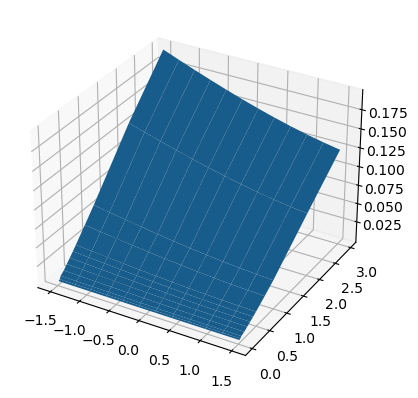

In [7]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(Klist, tlist)
Z = totalvarsurface[0]

ax.plot_surface(X, Y, Z)

plt.show()


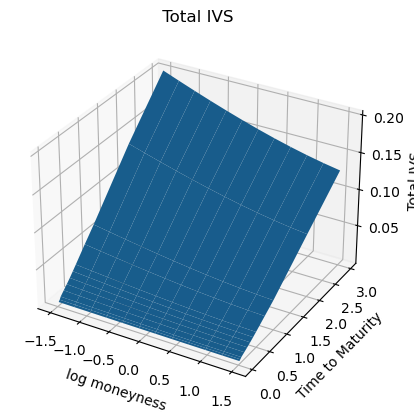

In [21]:
IVS_visualize(totalvarsurface[1])

In [42]:
IVS_visualize2(totalvarsurface[1], Klist, tlist, savepath='ivs_testimage',)

In [25]:
totalvarsurface[1]

(12, 12)

In [29]:
np.sqrt(2)

1.4142135623730951

In [30]:
# for implied volatility plot, instead of total implied variance
Ivollist = [totalvarsurface[i] for i in range(totalvarsurface.shape[0])]
Ivollist = [np.sqrt(x / tlist.reshape((-1,1))) for x in Ivollist ]


In [36]:
Ivollist[3]

array([[0.25719471, 0.24918491, 0.24114488, 0.23313488, 0.22524214,
        0.21758838, 0.21033506, 0.20368099, 0.19784478, 0.19302834,
        0.18936977, 0.18690799],
       [0.28192326, 0.27318424, 0.26441383, 0.25567757, 0.24707008,
        0.23872304, 0.23081082, 0.22354774, 0.21716954, 0.21189448,
        0.2078731 , 0.20515009],
       [0.29636604, 0.28722768, 0.27805835, 0.26892634, 0.25992995,
        0.25120559, 0.24293344, 0.23533467, 0.22865252, 0.22311285,
        0.21887291, 0.21598191],
       [0.26781273, 0.25962437, 0.25141089, 0.24323314, 0.23517824,
        0.22736659, 0.21995663, 0.21314237, 0.20713718, 0.20214005,
        0.19829151, 0.19563907],
       [0.25930775, 0.25144979, 0.24357033, 0.23572741, 0.22800369,
        0.22051287, 0.21340403, 0.20685924, 0.20107874, 0.19625009,
        0.19250771, 0.18990037],
       [0.25818147, 0.25043537, 0.24267092, 0.23494491, 0.22733777,
        0.21995962, 0.21295416, 0.20649651, 0.20077918, 0.19598336,
        0.19224092,

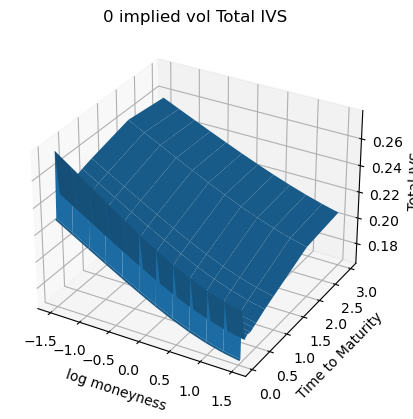

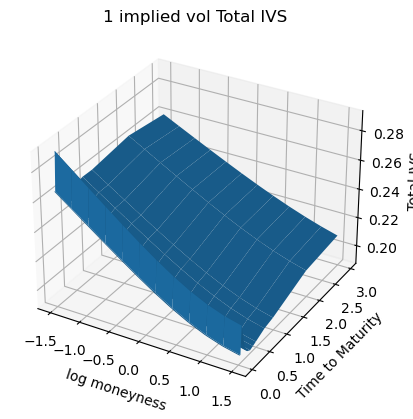

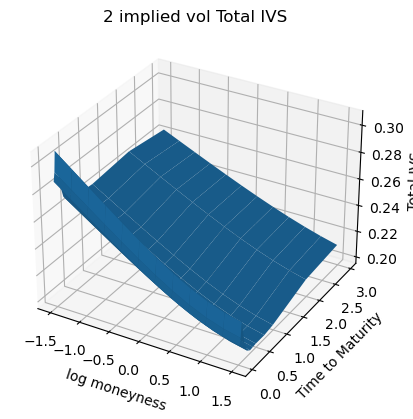

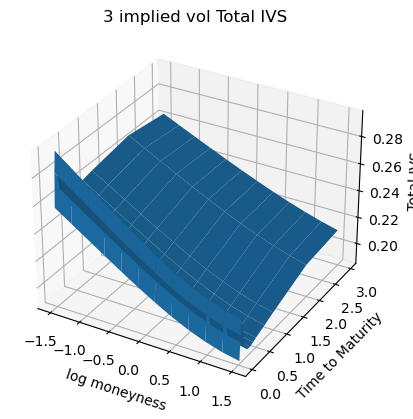

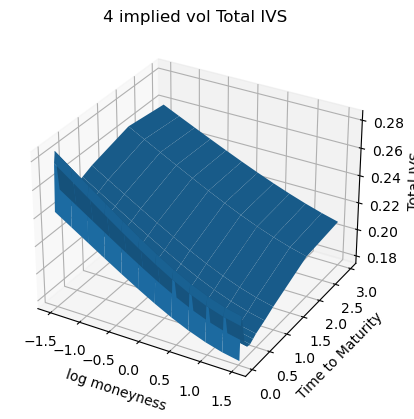

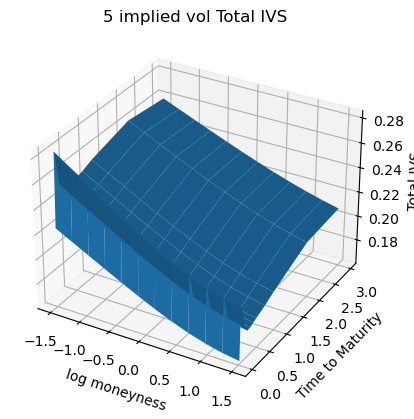

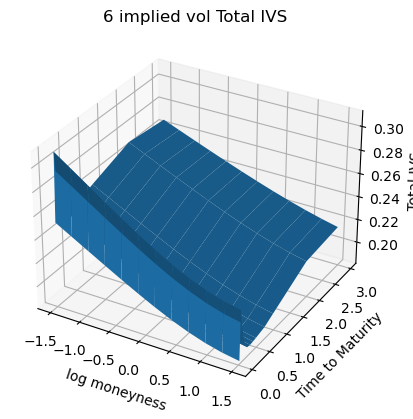

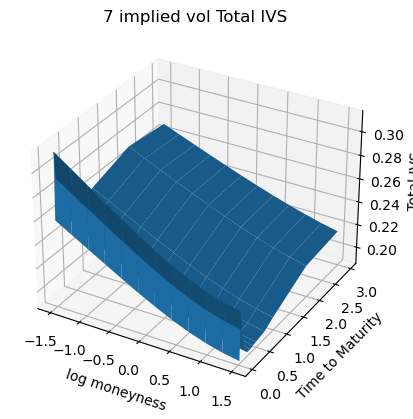

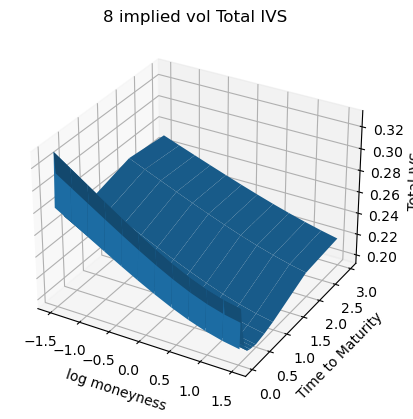

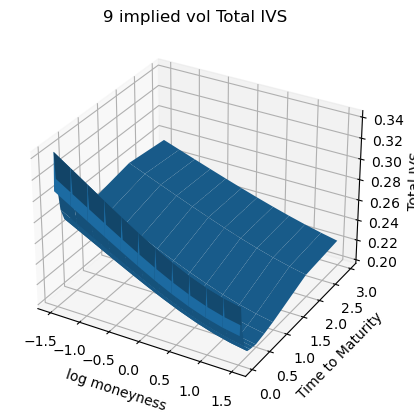

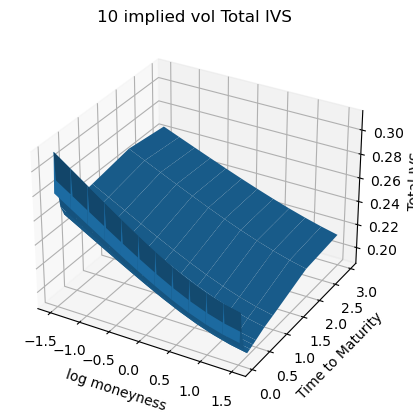

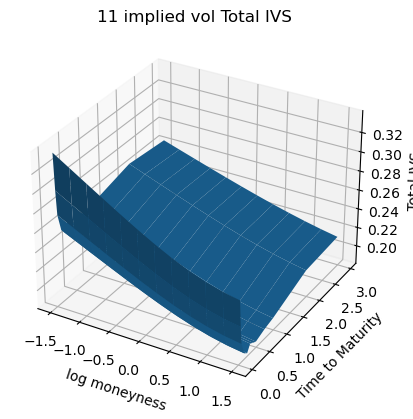

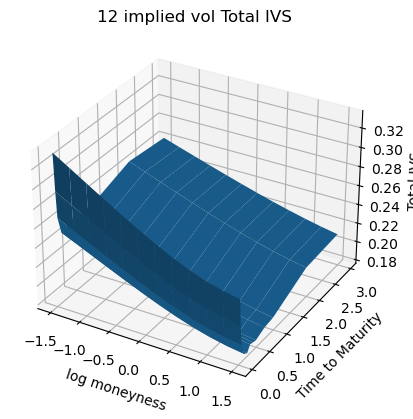

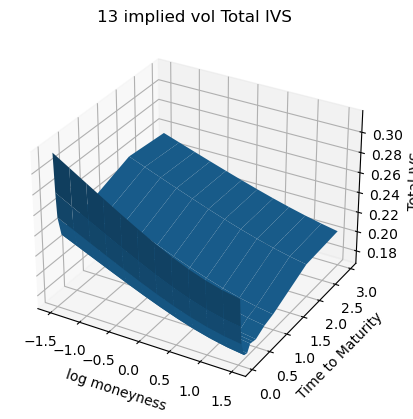

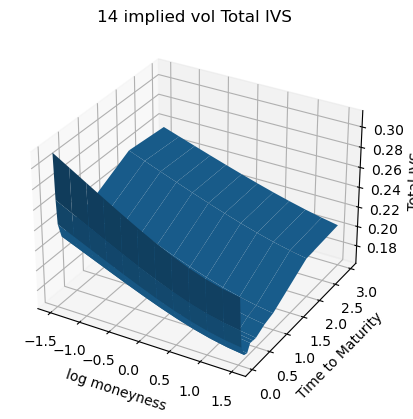

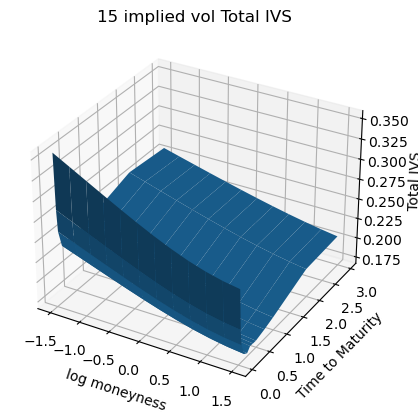

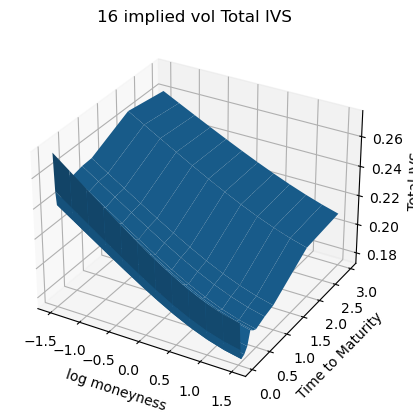

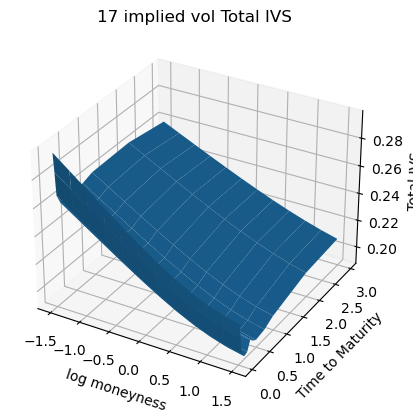

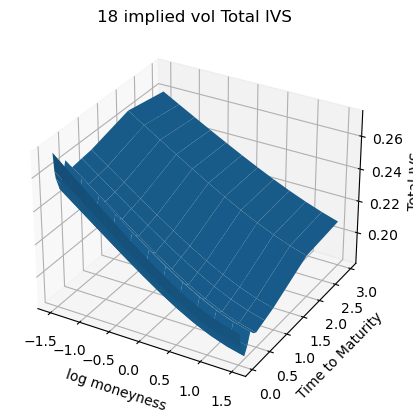

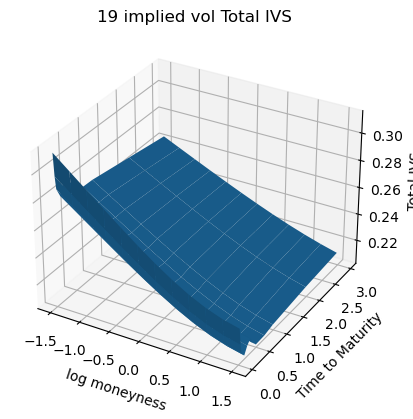

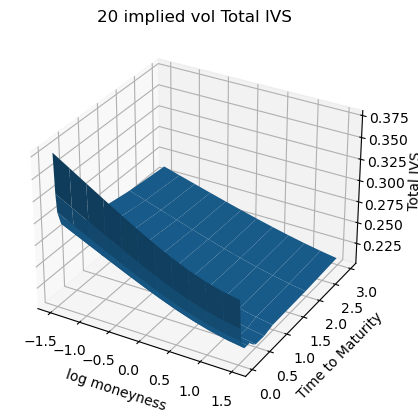

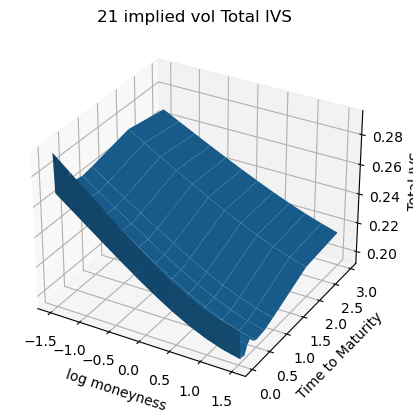

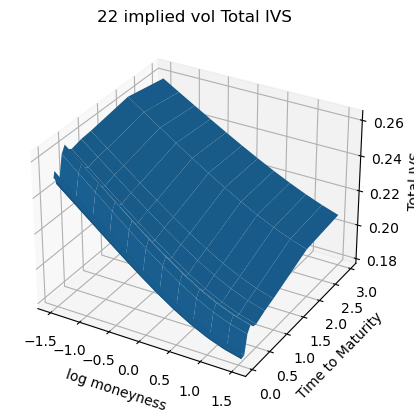

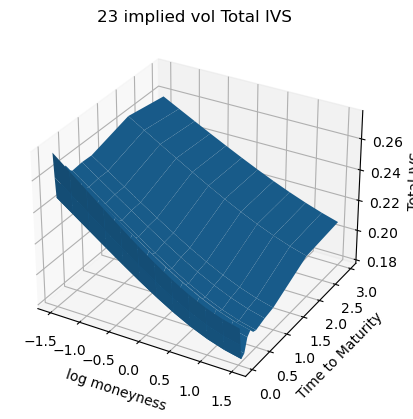

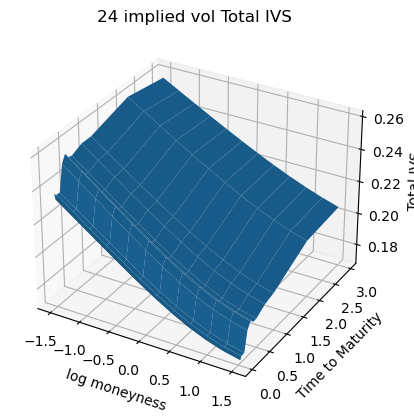

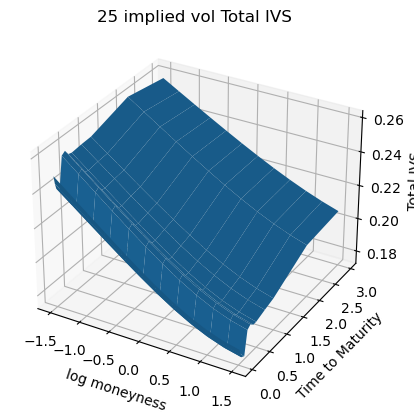

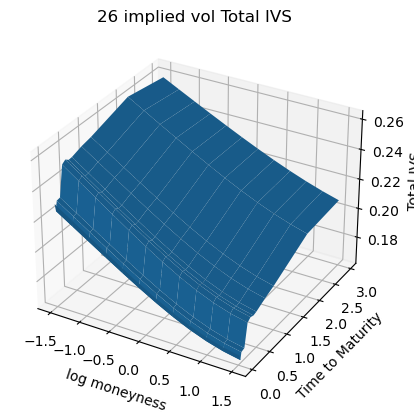

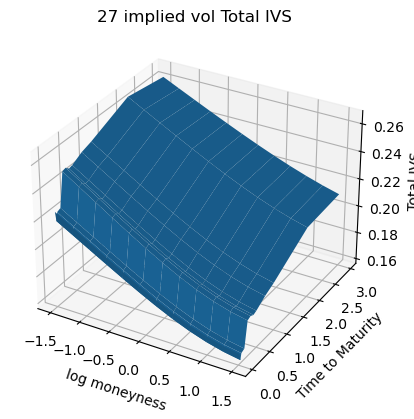

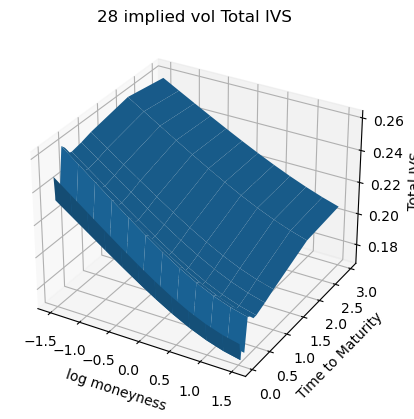

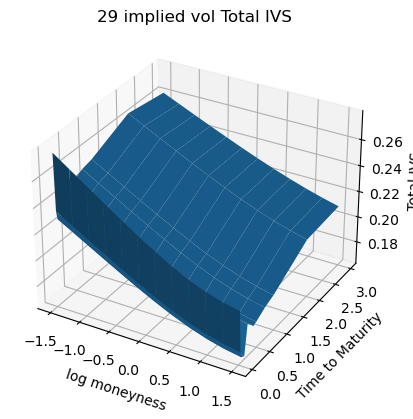

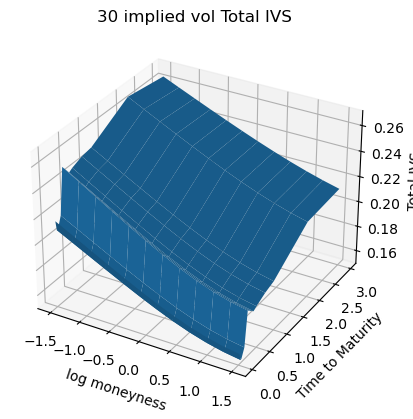

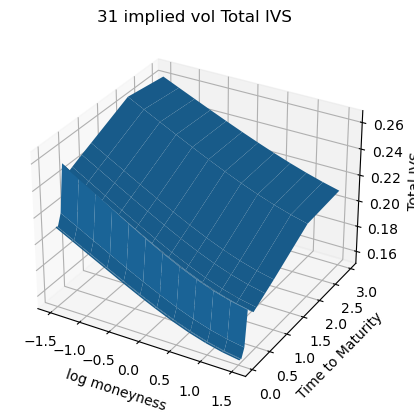

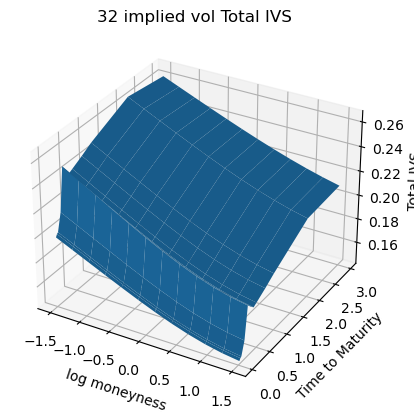

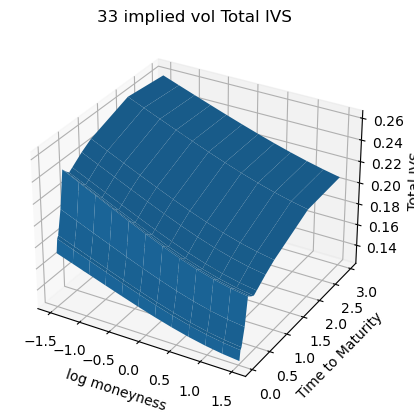

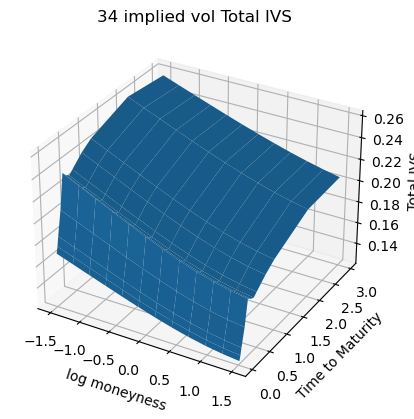

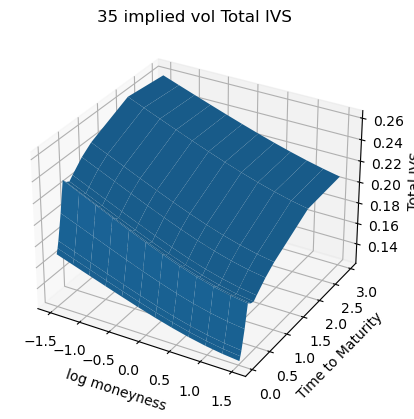

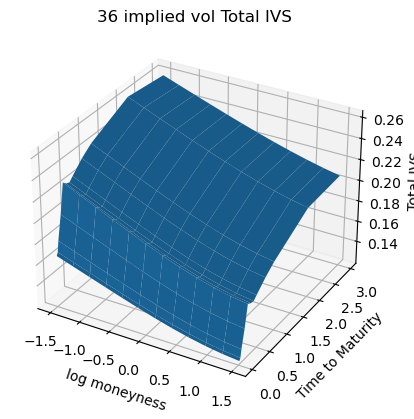

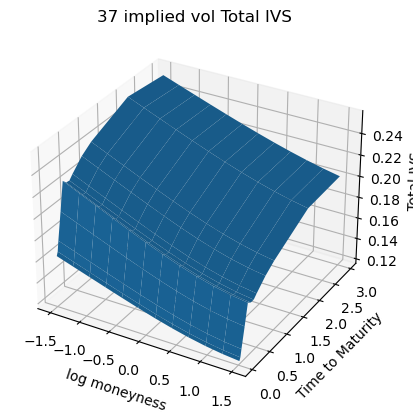

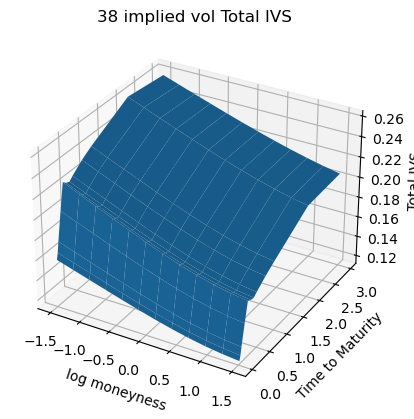

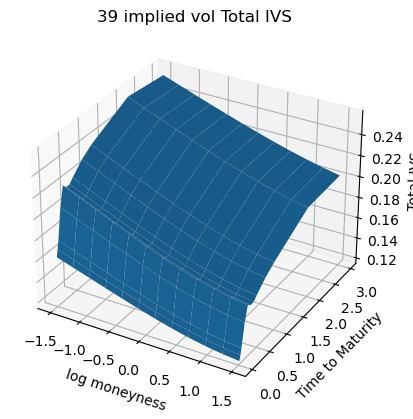

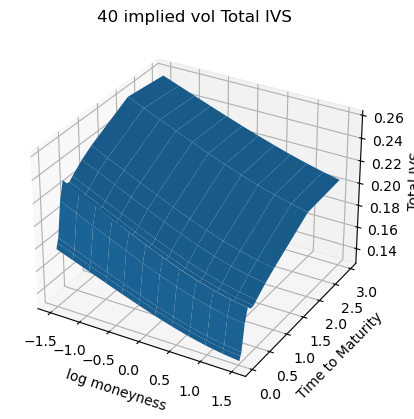

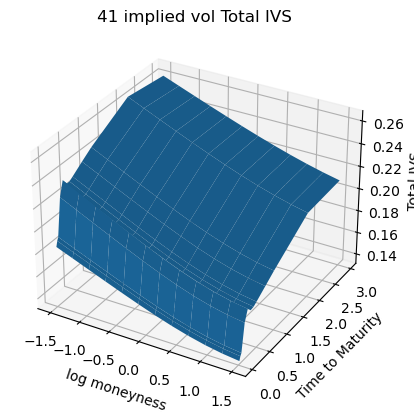

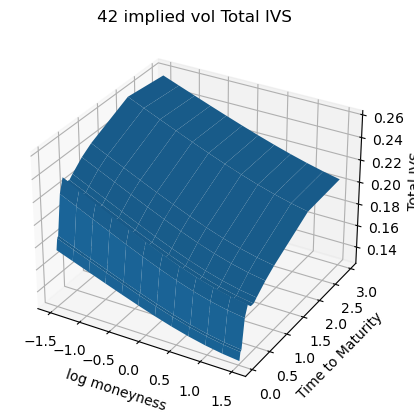

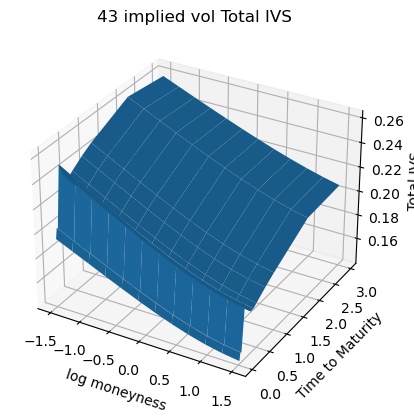

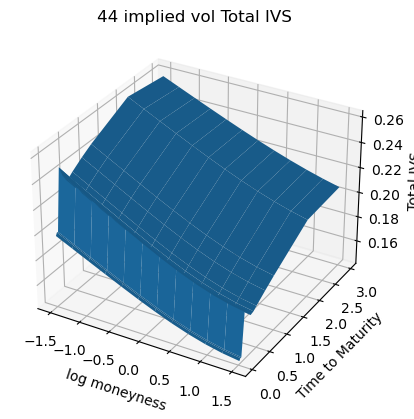

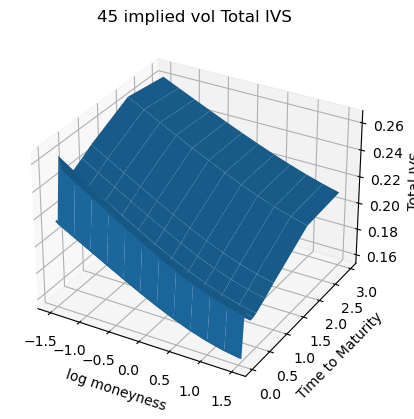

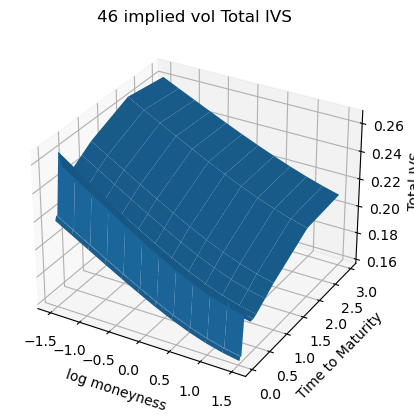

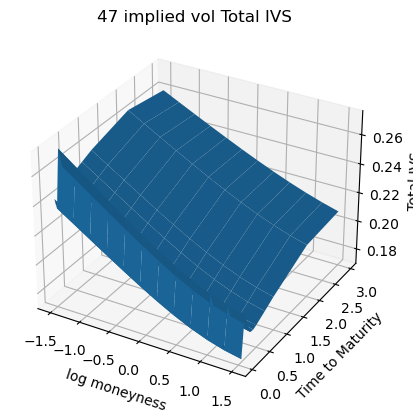

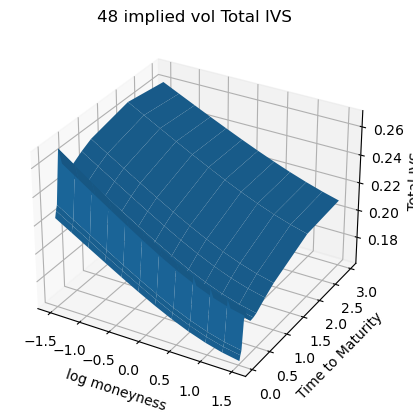

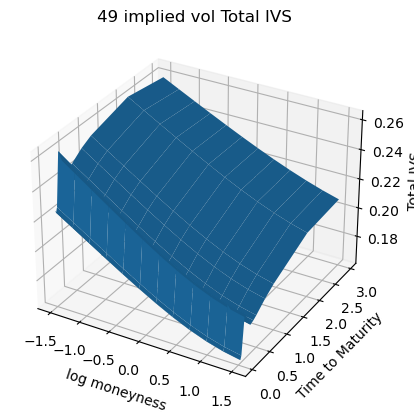

In [37]:
for i in range(50):
    IVS_visualize(Ivollist[i], plotname=str(i)+ " " + "implied vol")

In [39]:
tlist

array([0.02739726, 0.05479452, 0.08219178, 0.16438356, 0.24657534,
       0.32876712, 0.4109589 , 0.49315068, 0.73972603, 0.98630137,
       1.97260274, 2.95890411])

In [9]:
def ivs_plot(gen_row, plotname = ""):
    """accept inputs from ANN and GAN"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(Klist, tlist)
    ax.plot_surface(X, Y, gen_row, cmap=cm.gist_rainbow)

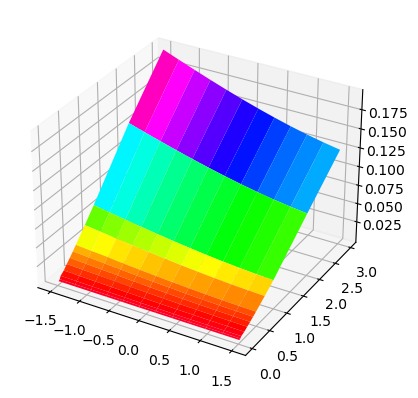

In [10]:
ivs_plot(totalvarsurface[0,:,:])

# Testing the MINST dataset

Our goal is to modify our IVS dataset in the same form as MINST dataset and tries to apply SMLD to our dataset. First train, then generate sample. Then investigate on inpainting feature. We hope to make a minimal example in the end. 

In [11]:
from torchvision.datasets import MNIST, CIFAR10, SVHN
import torchvision.transforms as transforms
import os


c:\Users\huiyi\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# image_size for MINST is 28

tran_transform = test_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor()
])

dataset = MNIST(os.path.join('run', 'datasets', 'mnist'), train=True, download=True,
                transform=tran_transform)
test_dataset = MNIST(os.path.join('run', 'datasets', 'mnist_test'), train=False, download=True,
                        transform=test_transform)

dataloader = DataLoader(dataset, batch_size=batch_size,shuffle=True, num_workers=4)

NameError: name 'DataLoader' is not defined

In [ ]:
dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
type(dataset)

torchvision.datasets.mnist.MNIST

In [ ]:
dataloader.dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
for i, (X,y) in enumerate(dataloader):
    print(i) 
    print(X.shape)
    print(y.shape)
    break 

0
torch.Size([24, 1, 28, 28])
torch.Size([24])


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# use tensordataset to prepare 
https://stackoverflow.com/questions/44429199/how-to-load-a-list-of-numpy-arrays-to-pytorch-dataset-loader

In [ ]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

my_x = [np.array([[1.0,2],[3,4]]),np.array([[5.,6],[7,8]])] # a list of numpy arrays
my_y = [np.array([4.]), np.array([2.])] # another list of numpy arrays (targets)

tensor_x = torch.Tensor(my_x) # transform to torch tensor
tensor_y = torch.Tensor(my_y)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset) # create your dataloader

C:\Users\huiyi\AppData\Local\Temp\ipykernel_26780\4250317334.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  tensor_x = torch.Tensor(my_x) # transform to torch tensor


In [ ]:
# IVSdataset = TensorDataset(totalvarsurface)

TypeError: 'int' object is not callable

In [ ]:
from torch.utils.data import Dataset

class Dset(Dataset):

    def __init__( self , x_train , transform=True):
        
        self.transform = transform
        self.x=x_train
        if self.transform:
            self.x = torch.from_numpy(self.x)
            


    def __getitem__(self , index):
         return self.x[index]
        

    def __len__(self):
        return len(self.x)

In [ ]:
from sklearn.model_selection import train_test_split
IVStrain, IVStest = train_test_split(totalvarsurface, test_size = 0.2, random_state = 42)

# add a d

In [ ]:
dataset = Dset(IVStrain)
batch_size = 24 
dataloader = DataLoader(dataset, batch_size=batch_size,shuffle=True)

test_dataset = Dset(IVStest)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=True, drop_last=True)

In [ ]:
test_iter = iter(test_loader)

In [ ]:
type(next(test_iter))

torch.Tensor

In [ ]:
dataset.x.shape

torch.Size([804, 12, 12])

In [ ]:
dataloader.dataset.x.shape

torch.Size([804, 12, 12])

In [ ]:
# removing num_workers solve the problem
for i, X in enumerate(dataloader):
    print(i)
    print(X.shape)
    break

0
torch.Size([24, 12, 12])


In [ ]:
check = scipy.io.loadmat('../msft_hestonlike_IVS22.mat')

In [ ]:
check["totalvarsurface"].shape

(1006, 12, 12)

# heston dataset testing

In [14]:
tlist = scipy.io.loadmat('Heston' + '_tlist.mat')
tlist = tlist['tlist'] # note that they are 2D array 
tlist = tlist.reshape((-1))
tlist_broadcast = tlist.reshape((1, len(tlist), 1))
# Klist = scipy.io.loadmat('msft_Klist.mat')
Klist = scipy.io.loadmat('Heston' + '_Klist.mat')
Klist = Klist['Klist'] # note that they are 2D array
Klist = Klist.reshape((-1))

In [19]:
logmlist = np.log(Klist / 100) - r* tlist
print(logmlist)

logmlist2 = np.log(Klist / 100)
logmlist2

[-0.515      -0.37428571 -0.23357143 -0.09285714  0.04785714  0.18857143
  0.32928571  0.47      ]


array([-0.5       , -0.35714286, -0.21428571, -0.07142857,  0.07142857,
        0.21428571,  0.35714286,  0.5       ])